In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [11]:
# Using the inspector to print the column names within the 'Station' table and its types
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
engine.execute('SELECT * FROM measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [13]:
# Using the inspector to print the column names within the 'Station' table and its types
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [15]:
measurement_station = session.query(Station, Measurement).filter(Station.station == Measurement.station).limit(5).all()
for record in measurement_station:
    (Station, Measurement) = record
    print(Station.station, Measurement.station )


USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397


In [16]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement

# Exploratory Climate Analysis

In [17]:
# Calculate the date 1 year ago from the last data point in the database
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [18]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()


('2010-01-01')

In [56]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation score
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

prcp_df = pd.DataFrame(
session.query(Measurement.date,func.sum(Measurement.prcp).label('total')).filter(Measurement.date > '2016-08-23').group_by(Measurement.date).all()
)

prcp_df.set_index('date', inplace=True)
prc=prcp_df.to_json(orient='index')
#print(prcp_df)
#prcp_df.to_csv("percipitation.csv", index=True, header=True)
print (prc)

{"2016-08-24":{"total":9.33},"2016-08-25":{"total":0.54},"2016-08-26":{"total":0.1},"2016-08-27":{"total":0.32},"2016-08-28":{"total":3.1},"2016-08-29":{"total":1.46},"2016-08-30":{"total":0.07},"2016-08-31":{"total":3.18},"2016-09-01":{"total":0.03},"2016-09-02":{"total":0.25},"2016-09-03":{"total":1.27},"2016-09-04":{"total":1.38},"2016-09-05":{"total":0.34},"2016-09-06":{"total":1.23},"2016-09-07":{"total":2.0},"2016-09-08":{"total":0.46},"2016-09-09":{"total":1.07},"2016-09-10":{"total":1.4},"2016-09-11":{"total":1.25},"2016-09-12":{"total":1.54},"2016-09-13":{"total":2.71},"2016-09-14":{"total":14.28},"2016-09-15":{"total":4.96},"2016-09-16":{"total":0.82},"2016-09-17":{"total":0.68},"2016-09-18":{"total":0.53},"2016-09-19":{"total":0.32},"2016-09-20":{"total":1.03},"2016-09-21":{"total":1.17},"2016-09-22":{"total":1.44},"2016-09-23":{"total":1.57},"2016-09-24":{"total":0.28},"2016-09-25":{"total":0.09},"2016-09-26":{"total":1.67},"2016-09-27":{"total":1.36},"2016-09-28":{"total":

In [20]:
prcp_df2 = prcp_df.reset_index()

In [21]:
prcp_df2.head()

,date,total
0,2016-08-24,9.33
1,2016-08-25,0.54
2,2016-08-26,0.10
3,2016-08-27,0.32
4,2016-08-28,3.10


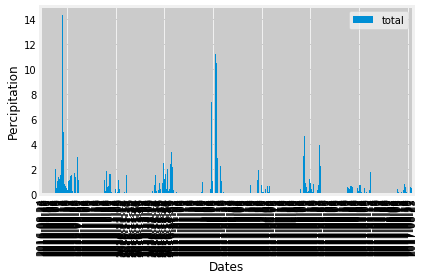

In [22]:
#Create a bar chart based off of the group series from before
prcp_chart = prcp_df2.plot(kind='bar')
#set the xlabel and ylabel using class methods
prcp_chart.set_xlabel("Dates")
prcp_chart.set_ylabel("Percipitation")
plt.tight_layout()
plt.show()





In [47]:
#fig, ax = plt.subplots(figsize=(20, 8))
#index = np.arange(prcp_df)
#ax.bar(prcp_df)
# Set x axis and tick locations
x_axis = np.arange(len(prcp_df2))
tick_locations = [value for value in x_axis]


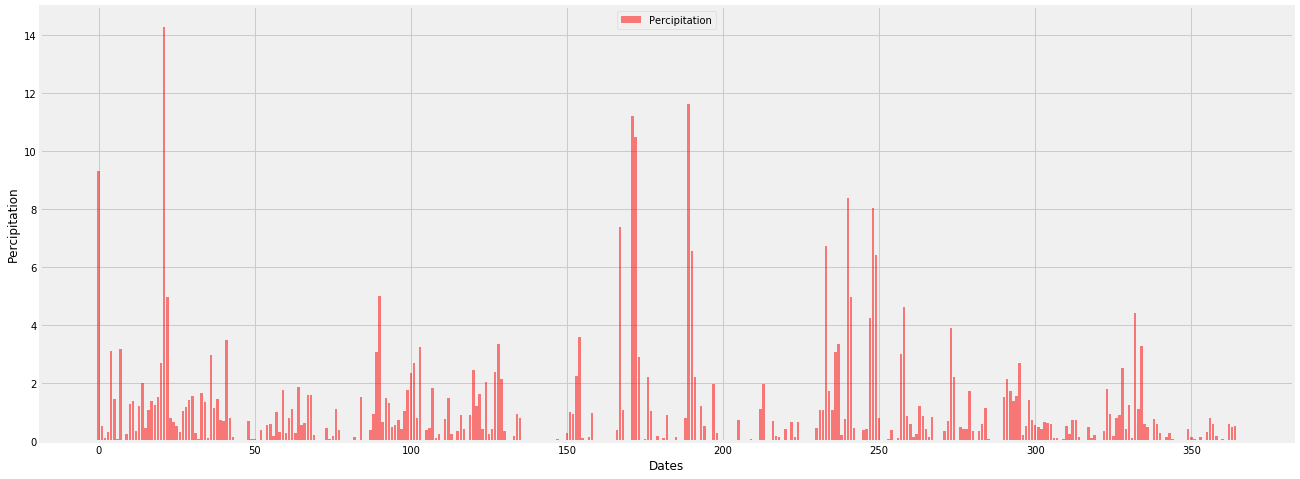

In [49]:
# Use Pandas Plotting with Matplotlib to plot the data
percip_chart = plt.figure(figsize=(20,8))
plt.bar(x_axis, prcp_df2["total"], color='r', alpha=.5, align="center", label="Percipitation")
#plt.xticks(tick_locations, prcp_df["date"], rotation="vertical")
plt.ylabel("Percipitation")
plt.xlabel("Dates")
plt.legend(loc="upper center")
plt.savefig("Percipitation over the last year.png")

In [50]:
# Use Pandas to calcualte the summary statistics for the precipitation data
 prcp_df2.describe()

,total
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


In [26]:
# Design a query to show how many stations are available in this dataset?
count_station_df = pd.DataFrame(
session.query((Measurement.station).label('count')).distinct().all()
)

print(count_station_df)
print(count_station_df.count())

         count
0  USC00519397
1  USC00513117
2  USC00514830
3  USC00517948
4  USC00518838
5  USC00519523
6  USC00519281
7  USC00511918
8  USC00516128
count    9
dtype: int64


In [58]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_df = pd.DataFrame(
session.query(Measurement.station,func.count(Measurement.station).label('count')).
    group_by(Measurement.station).
    order_by('count').all()
)
#print(station_df)
print(station_df.to_json(orient='index'))

{"0":{"station":"USC00518838","count":511},"1":{"station":"USC00517948","count":1372},"2":{"station":"USC00511918","count":1979},"3":{"station":"USC00514830","count":2202},"4":{"station":"USC00516128","count":2612},"5":{"station":"USC00519523","count":2669},"6":{"station":"USC00513117","count":2709},"7":{"station":"USC00519397","count":2724},"8":{"station":"USC00519281","count":2772}}


In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temp = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]


In [29]:

most_active_average = session.query(*temp).\
    filter(Measurement.station == "USC00519281").\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()

most_active_average

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [77]:
    #start = []
    temp = [Measurement.date, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]           
    #sdate = input(start)
    rresults = session.query(*temp)(Measurement.station, Measurement.date,Measurement.tobs.label('temperature')).\
        filter(Measurement.date == "2016-08-24").order_by(Measurement.date).all()
    # Convert list of tuples into normal list
    startr = list(np.ravel(rresults))
    return jsonify(startr)

TypeError: 'Query' object is not callable

In [30]:
# Query the last 12 months of temperature observation data 

tobs_df = pd.DataFrame(
session.query(Measurement.station, Measurement.date,Measurement.tobs.label('temperature')).
    filter(Measurement.date > '2016-08-23').
    all()
)

tobs_df.set_index('date', inplace=True)
print(tobs_df)



                station  temperature
date                                
2016-08-24  USC00519397         79.0
2016-08-25  USC00519397         80.0
2016-08-26  USC00519397         79.0
2016-08-27  USC00519397         77.0
2016-08-28  USC00519397         78.0
2016-08-29  USC00519397         78.0
2016-08-30  USC00519397         79.0
2016-08-31  USC00519397         80.0
2016-09-01  USC00519397         81.0
2016-09-02  USC00519397         80.0
2016-09-03  USC00519397         79.0
2016-09-04  USC00519397         75.0
2016-09-05  USC00519397         79.0
2016-09-06  USC00519397         76.0
2016-09-07  USC00519397         76.0
2016-09-08  USC00519397         80.0
2016-09-09  USC00519397         79.0
2016-09-10  USC00519397         78.0
2016-09-11  USC00519397         76.0
2016-09-12  USC00519397         78.0
2016-09-13  USC00519397         78.0
2016-09-14  USC00519397         75.0
2016-09-15  USC00519397         79.0
2016-09-16  USC00519397         80.0
2016-09-17  USC00519397         79.0
2

In [31]:
# Choose the station with the highest number of temperature observations.

count_tobs_df = pd.DataFrame(
session.query(Measurement.station,func.count(Measurement.station).label('count')).
    filter(Measurement.date > '2016-08-23').
    group_by(Measurement.station).
    order_by('count').all()
)

count_tobs_df.set_index('station', inplace=True)
print(count_tobs_df)


             count
station           
USC00517948    182
USC00514830    304
USC00519523    336
USC00513117    342
USC00516128    348
USC00519281    351
USC00519397    360


In [57]:
#Dataframe for this station and last 12 months 

station_tobs_df = pd.DataFrame(
session.query(Measurement.station, Measurement.date,Measurement.tobs.label('temperature')).
    filter((Measurement.date > '2016-08-23'),
           (Measurement.station == "USC00519397")).
    all()
)

#station_tobs_df.set_index('date', inplace=True)
#prcp_df = prcp_df.reset_index()
#print(station_tobs_df)
print(station_tobs_df.to_json(orient='index'))



{"0":{"station":"USC00519397","date":"2016-08-24","temperature":79.0},"1":{"station":"USC00519397","date":"2016-08-25","temperature":80.0},"2":{"station":"USC00519397","date":"2016-08-26","temperature":79.0},"3":{"station":"USC00519397","date":"2016-08-27","temperature":77.0},"4":{"station":"USC00519397","date":"2016-08-28","temperature":78.0},"5":{"station":"USC00519397","date":"2016-08-29","temperature":78.0},"6":{"station":"USC00519397","date":"2016-08-30","temperature":79.0},"7":{"station":"USC00519397","date":"2016-08-31","temperature":80.0},"8":{"station":"USC00519397","date":"2016-09-01","temperature":81.0},"9":{"station":"USC00519397","date":"2016-09-02","temperature":80.0},"10":{"station":"USC00519397","date":"2016-09-03","temperature":79.0},"11":{"station":"USC00519397","date":"2016-09-04","temperature":75.0},"12":{"station":"USC00519397","date":"2016-09-05","temperature":79.0},"13":{"station":"USC00519397","date":"2016-09-06","temperature":76.0},"14":{"station":"USC00519397"

In [33]:
#plot the results as a histogram
#Create 12 bins in which to place values based upon the query above with temp between 56-87
bins = [51, 54, 57, 60, 63, 66, 69, 72, 75, 79, 82, 85, 88]


In [34]:
# Slice the data and place it into bins
pd.cut(station_tobs_df["temperature"], bins).head()

0    (75, 79]
1    (79, 82]
2    (75, 79]
3    (75, 79]
4    (75, 79]
Name: temperature, dtype: category
Categories (12, interval[int64]): [(51, 54] < (54, 57] < (57, 60] < (60, 63] ... (75, 79] < (79, 82] < (82, 85] < (85, 88]]

In [35]:
#Place the data series into a new column inside of the DataFrame
station_tobs_df["Temp Group"] = pd.cut(station_tobs_df["temperature"], bins)

In [36]:
temp_group = station_tobs_df.groupby("Temp Group")
print(temp_group["temperature"].count())

Temp Group
(51, 54]      0
(54, 57]      0
(57, 60]      1
(60, 63]     10
(63, 66]     17
(66, 69]     24
(69, 72]     47
(72, 75]     50
(75, 79]    139
(79, 82]     70
(82, 85]      1
(85, 88]      1
Name: temperature, dtype: int64


In [37]:
station_tobs_df.temperature.values


array([79., 80., 79., 77., 78., 78., 79., 80., 81., 80., 79., 75., 79.,
       76., 76., 80., 79., 78., 76., 78., 78., 75., 79., 80., 79., 81.,
       77., 77., 78., 76., 82., 81., 78., 80., 80., 79., 80., 80., 80.,
       79., 79., 79., 80., 80., 79., 78., 76., 75., 80., 80., 79., 80.,
       79., 78., 78., 80., 81., 79., 77., 79., 78., 77., 77., 78., 77.,
       78., 77., 76., 77., 77., 77., 77., 77., 76., 75., 71., 71., 71.,
       71., 72., 71., 72., 77., 77., 77., 77., 77., 75., 76., 76., 75.,
       72., 74., 75., 73., 76., 75., 68., 75., 75., 72., 69., 71., 68.,
       67., 69., 73., 70., 70., 70., 66., 67., 70., 66., 62., 71., 73.,
       69., 77., 74., 71., 72., 74., 74., 74., 74., 71., 73., 69., 66.,
       62., 66., 63., 62., 63., 64., 66., 60., 64., 63., 78., 67., 67.,
       65., 66., 67., 66., 72., 73., 71., 72., 72., 72., 69., 72., 71.,
       65., 64., 67., 67., 68., 70., 61., 65., 72., 73., 76., 64., 62.,
       61., 71., 69., 68., 74., 75., 75., 71., 71., 68., 69., 71

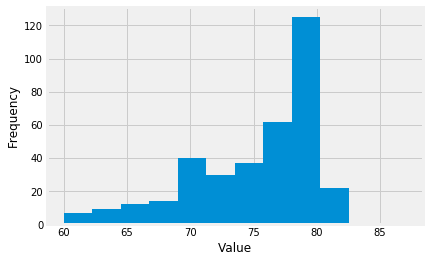

In [38]:
x = station_tobs_df.temperature.values

plt.hist(x, 12) 
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

![precipitation](Images/precipitation.png)

![describe](Images/describe.png)

![precipitation](Images/station-histogram.png)

In [39]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [40]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [41]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [42]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [43]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [44]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [45]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [46]:
# Plot the daily normals as an area plot with `stacked=False`
